# Sunspotter Data Preproccessing


***

# About the dataset

***

# Sunspotter - 14 years of SoHO/MDI

doi: 10.5281/zenodo.1478972

Second dataset based on automated detections produced by SMART [1] with data
between May 1996 and August 2010 and classifications by volunteers through the
zooniverse's [Sunspotter project](https://www.sunspotter.org/).

Volunteers had to choose the most complex active region of a pair based on a
random selection of the least classified images. Unlike the first round [2], all
active regions were scaled to have the same size. Attempting therefore to remove
the bias produced by the differences on sizes.

The dataset is composed of five files:
 - lookup_timesfits.csv: lists the filenames and the date of the data acquisition.
 - lookup_properties.csv: lists the properties about the active region observed
   in each frame to be classified. Some of the properties as measured by SMART [1]
 - classifications.csv: lists each classification made by the volunteers.
 - rankings.csv: lists the final ranking on complexity.
 - users_links.csv: cross identifiers of users between dataset 2 (this one) and
   dataset 1 [2].

The score provided on the rankings file follows the [Elo rating
system](https://en.wikipedia.org/wiki/Elo_rating_system). However, a new score
following other selection mechanism is possible using the data available on the
classification file.

Though the user's information has been removed, the classifications keep an
index to differentiate classifications made by different users.

Some software to ingest the tables into a sqlite database and to obtain some
preliminary results are available on [GitHub](https://github.com/sunspotter/).


[1]: DOI: [10.1016/j.asr.2010.06.024](https://doi.org/10.1016/j.asr.2010.06.024)

[2]: DOI: [10.5281/zenodo.1478966](https://doi.org/10.5281/zenodo.1478966)


## Header information


### lookup_timesfits.csv

| header   | description                                                |
| ---      | ---                                                        |
| id       | unique identifier for each fits file used on other tables. |
| filename | name of the original fits file used.                       |
| obs_date | date and time of when the image was observed.              |


### lookup_properties.csv

| header        | description                                                                                   |
| ---           | ---                                                                                           |
| id            | unique identifier for each frame                                                              |
| filename      | filename of the frame. Prepend http://www.sunspotter.org/subjects/standard/ to see the image. |
| zooniverse_id | internal zooniverse identifier                                                                |
| area          | SMART detection property.                                                                     |
| areafrac      | SMART detection property.                                                                     |
| areathesh     | SMART detection property.                                                                     |
| arid          | SMART detection property.                                                                     |
| bipolesep     | SMART detection property.                                                                     |
| bmax          | SMART detection property.                                                                     |
| c1flr12hr     | at least one C1.0 or greater flare within 12 hr after the observation.                        |
| c1flr24hr     | at least one C1.0 or greater flare within 24 hr after the observation.                        |
| c5flr12hr     | at least one C5.0 or greater flare within 12 hr after the observation.                        |
| c5flr24hr     | at least one C5.0 or greater flare within 24 hr after the observation.                        |
| deg2dc        | SMART detection property.                                                                     |
| detstatus     | SMART detection property.                                                                     |
| id_filename   | link to id on lookup_timesfits.csv.                                                           |
| flux          | SMART detection property.                                                                     |
| fluxfrac      | SMART detection property.                                                                     |
| hcpos_x       | heliocentric longitude of the active region's centre.                                         |
| hcpos_y       | heliocentric latitude of the of the active region's centre.                                   |
| m1flr12hr     | at least one M1.0 or greater flare within 12 hr after the observation.                        |
| m1flr24hr     | at least one M1.0 or greater flare within 24 hr after the observation.                        |
| m5flr12hr     | at least one M5.0 or greater flare within 12 hr after the observation.                        |
| m5flr24hr     | at least one M5.0 or greater flare within 24 hr after the observation.                        |
| magstatus     | SMART detection property.                                                                     |
| npsl          | SMART detection property.                                                                     |
| posstatus     | SMART detection property.                                                                     |
| pslcurvature  | SMART detection property.                                                                     |
| psllength     | SMART detection property.                                                                     |
| pxpos_x       | pixel position of the active region's centre along the horizontal axis.                       |
| pxpos_y       | pixel position of the active region's centre along the vertical axis.                         |
| pxscl_hpc2stg | SMART detection property.                                                                     |
| rvalue        | SMART detection property.                                                                     |
| sszn          | sunspotter (formerly sunspotzoo) number. Must be equal to id.                                 |
| sszstatus     | SMART detection property.                                                                     |
| wlsg          | SMART detection property.                                                                     |


### classifications.csv

| header                     | description                                |
| ---                        | ---                                        |
| id                         | unique identifier for each classification. |
| zooniverse_class           | internal identifier.                       |
| user_id                    | user that performed the classification.    |
| image_id_0                 | image identifier from lookup_properties.   |
| image_id_1                 | image identifier from lookup properties.   |
| image0_more_complex_image1 | image number of the complex one.           |
| used_inverted              | whether the user inverted the colours.     |
| date_created               | dates when the classification happened.    |
| date_started               | dates when the classification happened.    |
| date_finished              | dates when the classification happened.    |


### rankings.csv

| header   | description                                 |
| ---      | ---                                         |
| id       | unique identifier for each ranking.         |
| image_id | image identifier from lookup_properties.    |
| count    | number of classifications of that image.    |
| k_value  | K-factor used for the Elo rating system.    |
| score    | final score based on the Elo rating system. |
| std_dev  | standard deviation.                         |



***

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sunpy.map import Map
import sunpy
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np
from sunpy.time import TimeRange
from sunpy.net import hek2vso
from sunpy.net import hek

***

# Reading the Dataset

In [ ]:
classifications = pd.read_csv("../classifications.csv", delimiter=';')
lookup_timesfits = pd.read_csv("../lookup_timesfits.csv", delimiter=';')
lookup_properties = pd.read_csv("../lookup_properties.csv", delimiter=';')
rankings = pd.read_csv("../rankings.csv", delimiter=';')

In [ ]:
rankings.head()

In [ ]:
classifications.head()

In [ ]:
lookup_properties.head()

In [ ]:
lookup_timesfits.head()

****

# Helper functions
These were created to facilitate adhoc analysis.  

All will be refined and placed in a Data Analysis Class that would be subclassed by PyTorch Data Loader class

## Proto SunPy Search Events Objects functions using HEK

In [ ]:
def get_hek_tables(obsdate):
    client = hek.HEKClient()
    timerange = get_time_range(obsdate)
    event_type = 'AR'
    result = client.search(hek.attrs.Time(timerange.start,timerange.end),hek.attrs.EventType(event_type))

    obsdate = "T".join(obsdate.split())

    refined_result = result[result['obs_observatory'] == 'SOHO'] 
    refined_result = refined_result[refined_result['event_starttime'] <= obsdate]
    refined_result = refined_result[refined_result['event_endtime'] > obsdate]
    
    return refined_result


def get_rectangle_coordinates_hek(obsdate, smap):

    refined_result = get_hek_tables(obsdate)
    
    bottom_x = refined_result['boundbox_c1ll']
    bottom_y = refined_result['boundbox_c2ll']
    top_x = refined_result['boundbox_c1ur']
    top_y = refined_result['boundbox_c2ur']
    width = np.abs(top_x - bottom_x) * u.arcsec
    height = np.abs(top_y - bottom_y) * u.arcsec

    bottom_left = SkyCoord([(bottom_x[i] * u.arcsec, bottom_y[i] * u.arcsec) for i in range(len(width))],
                           frame=smap.coordinate_frame)

    return bottom_left, width, height


## Sunspotter Helper functions

In [ ]:
def get_correspondin_map(obsdate,path = "magnetograms/data/"):
    return Map(path+obsdate+".jp2")


def get_timefits_id(obsdate):
    return lookup_timesfits[lookup_timesfits.obs_date == obsdate].get(key = '#id').iloc[0]


def get_properties(idx):
    return lookup_properties[lookup_properties.id_filename == idx]


def get_time_range(obsdate):
    return TimeRange(obsdate, 400 * u.second)


def get_rectangle_coordinates(obsdate):

    # Get corresponding Solar Map from the Downloaded JPEG2000 files.
    smap = get_correspondin_map(obsdate)

    # Sample lookup_timefits and lookup_properties to get all regions of interest
    idx = get_timefits_id(obsdate)
    properties = get_properties(idx)

    # Get all required data for plotting squares
    x = properties.hcpos_x.values * u.arcsec # X coordinate of center
    y = properties.hcpos_y.values * u.arcsec # Y coordinate of center

    side = np.sqrt(properties.area).values * u.arcsec 
    center = SkyCoord([(x[i],y[i]) for i in range(len(x))],frame=smap.coordinate_frame)

    # Creating array of SkyCoords
    bottom_left = SkyCoord([(x[i]-side[i],y[i]-side[i]) for i in range(len(x))],frame=smap.coordinate_frame)
    top_right = SkyCoord([(x[i]+side[i],y[i]+side[i]) for i in range(len(x))],frame=smap.coordinate_frame)

    return bottom_left, top_right, side


def plot_points(obsdate):
    
    # Get corresponding Solar Map from the Downloaded JPEG2000 files.
    smap = get_correspondin_map(obsdate)
    
    # Getting coordinate information 
    bottom_left, top_right, side = get_rectangle_coordinates(obsdate)
    
    fig = plt.figure(figsize=(12,10),dpi=100)
    ax = plt.subplot(projection=smap)
    im = smap.plot()
    
    for i in range(len(side)):
        smap.draw_rectangle(bottom_left[i],side[i]*2,side[i]*2, color='r')

    b,w,h = get_rectangle_coordinates_hek(obsdate, smap)
    
    for i in range(len(w)):
        smap.draw_rectangle(b[i], w[i], h[i], color='b', label = "HEK data")

    sunspotter, = plt.plot([], color='r', label="Sunspotter Data")
    hek, = plt.plot([], color='b', label = "HEK Data")

    plt.legend(handles=[sunspotter, hek])
    plt.show()
    

def get_submaps(obsdate):

    # Get corresponding Solar Map from the Downloaded JPEG2000 files.
    smap = get_correspondin_map(obsdate)
    
    # Getting coordinate information 
    bottom_left, top_right, side = get_rectangle_coordinates(obsdate)
    
    submap_list = []
    
    for i in range(len(side)):
        submap_list.append(smap.submap(bottom_left[i],top_right[i]))

    return submap_list



def plot_submaps(submap_list):
    
    num = len(submap_list)
    fig = plt.figure(figsize=(12,10),dpi=100)
    for i in range(num):
        ax = fig.add_subplot(num//2+1,2,i+1,projection=submap_list[i])
        submap_list[i].plot()
    plt.show()

*********

# Some Random Plotting tests

In [ ]:
n = np.random.randint(0,len(lookup_timesfits))
obsdate = lookup_timesfits.obs_date.iloc[n]
print(f"obsdate = {obsdate}")

In [ ]:
plot_points(obsdate)

obsdate = 1997-03-13 01:36:04


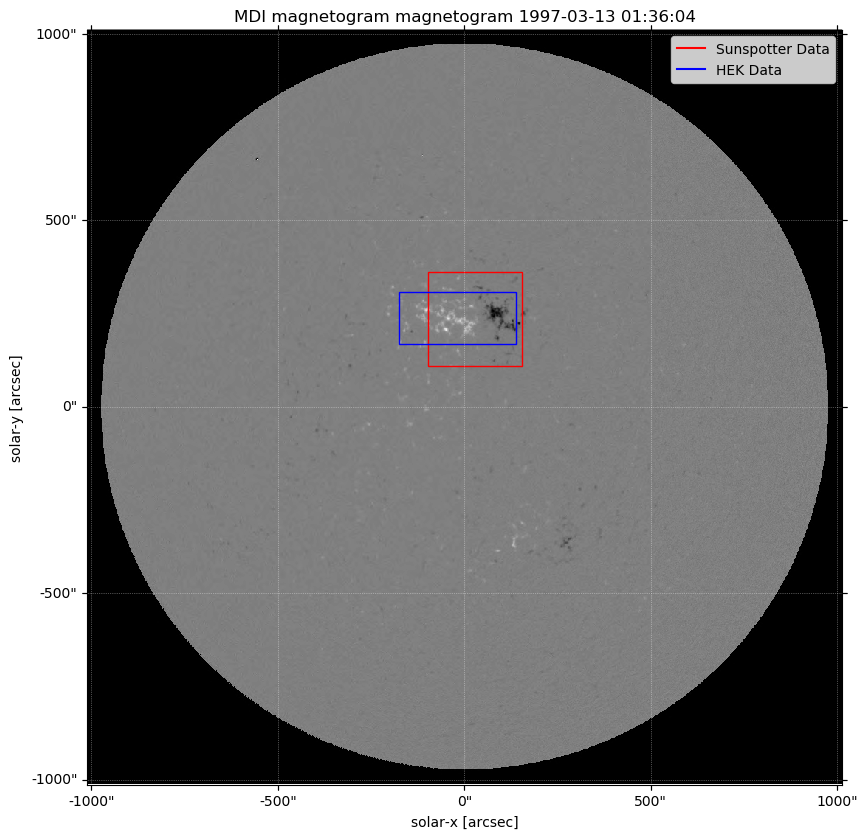

obsdate = 2006-04-12 03:11:01


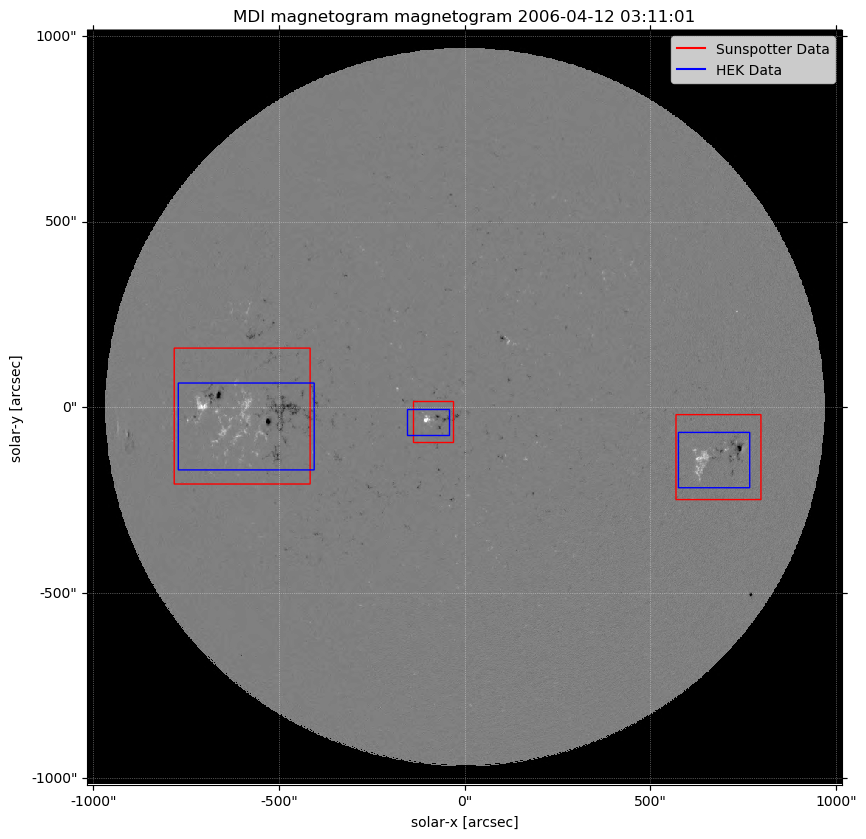

obsdate = 2004-07-15 20:47:02


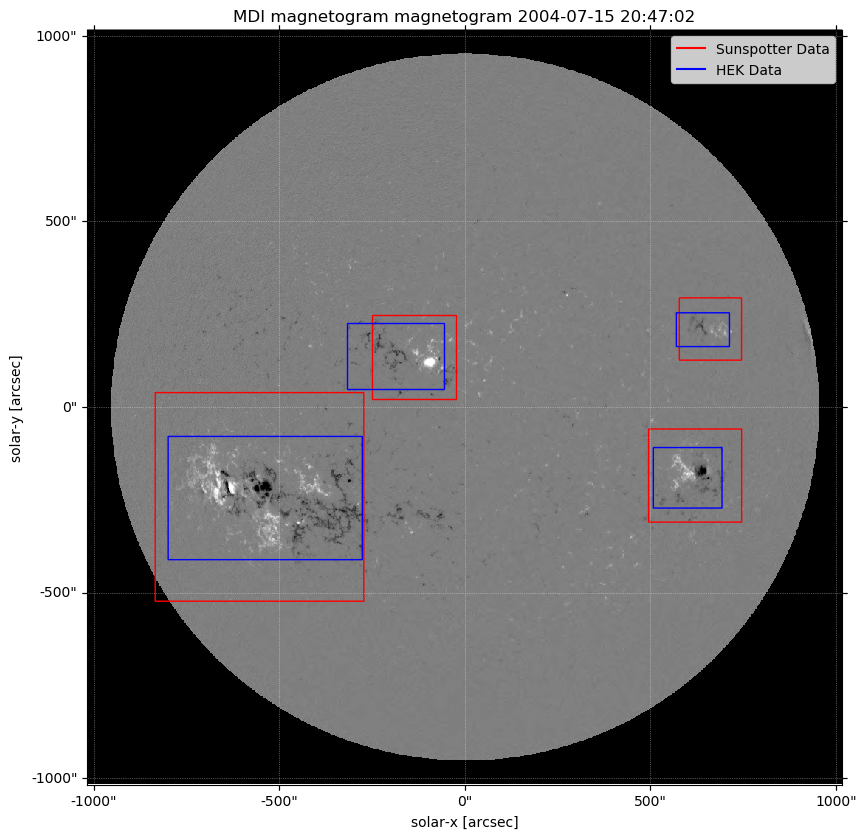

obsdate = 1999-12-08 03:15:03


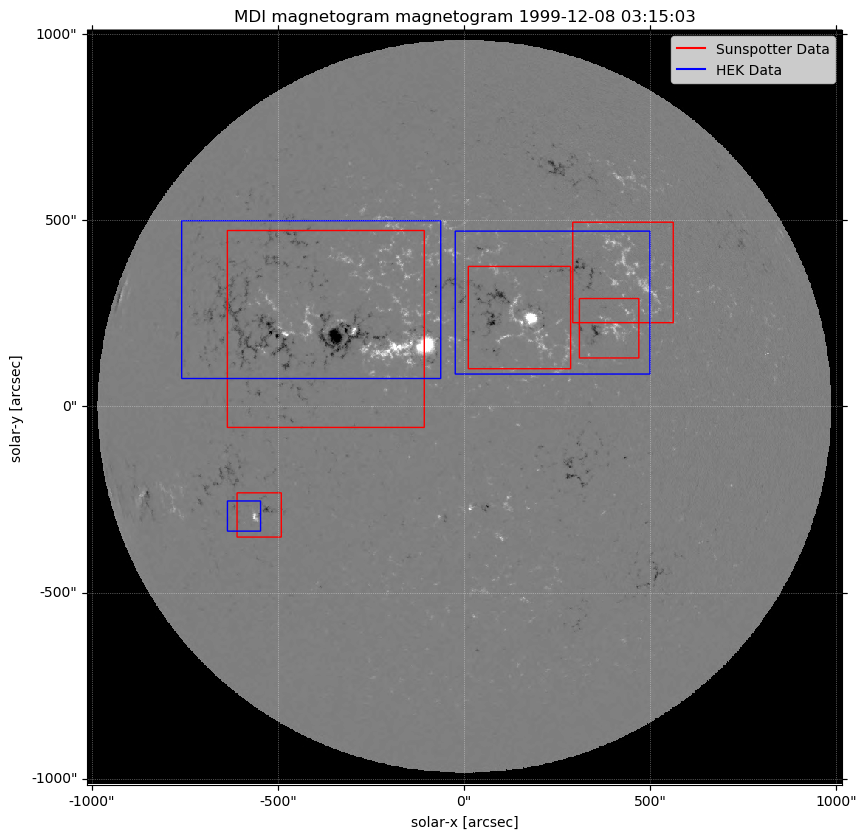

obsdate = 1997-05-16 14:28:05


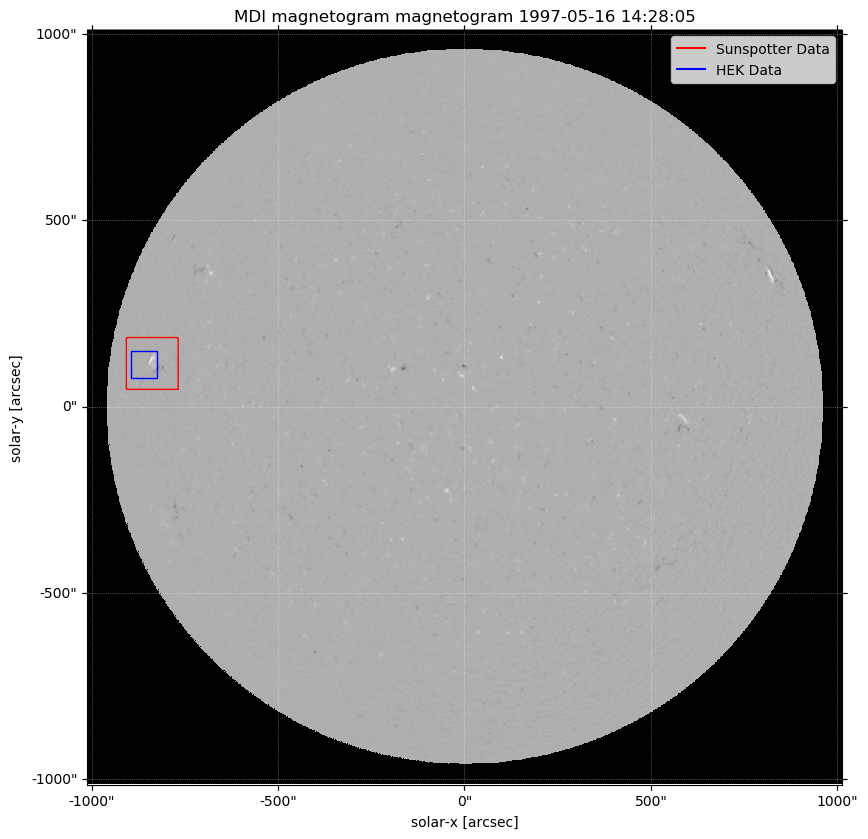

obsdate = 2007-12-11 06:23:01


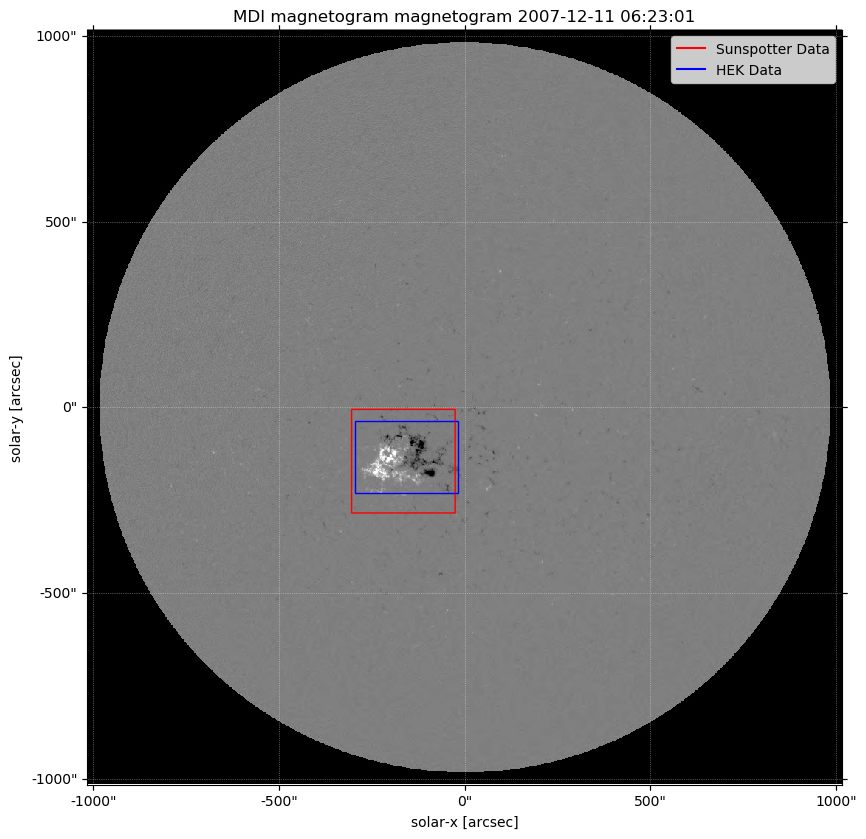

obsdate = 2010-01-10 01:39:02


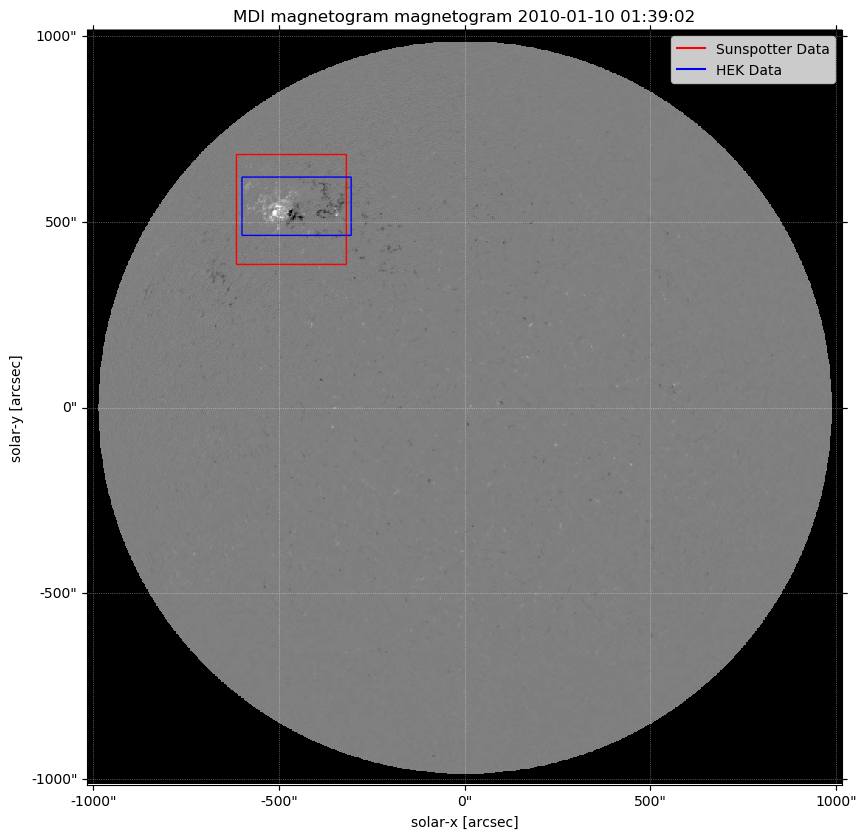

In [11]:
for i in range(7):
    n = np.random.randint(0,len(lookup_timesfits))
    obsdate = lookup_timesfits.obs_date.iloc[n]
    print(f"obsdate = {obsdate}")
    plot_points(obsdate)

****

# Next Steps:
* Figure out the padding size for each ROI submap so that all images can be fed to standard Image Processing ML and Linear Algebra based algorithms.
* Figure out a way to keep track of individual sunspots for TimeSeries Analysis.
* Commencing Exploratory Data Analysis of `lookup_properties` in conjunction with corresponding
    ROI taken from the fulldisk magnetograms.

***********

In [4]:
Event_Types = pd.read_csv('/home/apollo/Event_Types.txt',delimiter='\t')

In [5]:
Event_Types.columns

Index(['Parameter ', 'Type ', 'AR ', 'CE ', 'CD ', 'CH ', 'CW ', 'FI ', 'FE ',
       'FA ', 'FL ', 'LP ', 'OS ', 'SS ', 'EF ', 'CJ ', 'PG ', 'OT ', 'NR ',
       'SG ', 'SP ', 'CR ', 'CC ', 'ER ', 'TO ', 'HY ', 'BU ', 'EE ', 'PB ',
       'PT ', 'Description of attribute'],
      dtype='object')

In [8]:
Event_Types = Event_Types[['Parameter ','Description of attribute']].sort_values('Parameter ').reset_index()
Event_Types = Event_Types[['Parameter ','Description of attribute']]
Event_Types['Parameter '] = Event_Types['Parameter '].apply(lambda x : x.lower().strip())

In [13]:
Event_Types

,Parameter,Description of attribute
0,absnetcurrenthelicity,Absolute value of the net current helicity
1,ar_axislength,Axis length (bipole separation distance)
2,ar_compactnesscls,Active Region Compactness class
3,ar_lengthunit,Units for AR_AxisLength and AR_NeutralLength
4,ar_mcintoshcls,Active Region McIntosh class
...,...,...
236,wavelmaxpower,Wavelength at which spatial power spectrum peaks
237,wavelmaxpoweruncert,Uncertainty of WavelMaxPower
238,wavelmaxrange,Maximum wavelength of wavelength range for spa...
239,wavelminrange,Minimum wavelength of wavelength range for spa...
